In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pymc3 as pm

## Data

In [2]:
ns = [5, 50, 500]
sigma_eta = np.sqrt(0.1)
ys = []
for n in ns:
    ys.append(np.random.normal(1, sigma_eta, n))

## Inference Approaches

### Analytic Solution

The estimation of theta: 1.1734972222249342
The estimation of theta: 0.9471592854294828
The estimation of theta: 0.9998368866162263


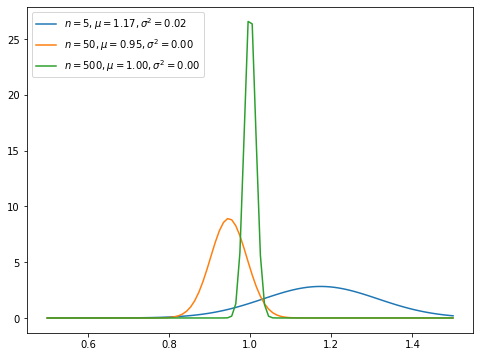

In [27]:
plt.figure(figsize=(8, 6))
for i,n in enumerate(ns):
    y = ys[i]

    # prior
    theta0 = 2 #
    sigma0 = np.sqrt(6)
    y_mean = np.mean(y)
    
    # postorior
    thetaN = (n * sigma0**2 * y_mean + sigma_eta**2 * theta0) / \
                (n * sigma0**2 + sigma_eta**2)
    sigmaN2 = sigma_eta**2 * sigma0**2 / (n * sigma0**2 + sigma_eta**2)

    xn = np.linspace(0.5, 1.5, 100)
    pn = norm(thetaN, np.sqrt(sigmaN2)).pdf(xn)
    print("The estimation of theta: {}".format(thetaN))
    plt.plot(xn, pn, label="$n={}, \mu={:.2f}, \sigma^2={:.2f}$".format(n, thetaN, sigmaN2))
plt.legend(loc=2)
plt.show()

### Laplacian Approximation

logp = -20.216, ||grad|| = 41.463: 100%|████████| 4/4 [00:00<00:00, 399.98it/s]


The estimation of theta: 1.1734972222249342


logp = -286.12, ||grad|| = 526.6: 100%|█████████| 4/4 [00:00<00:00, 285.70it/s]


The estimation of theta: 0.9471592854294829


logp = -2,631.2, ||grad|| = 5,001: 100%|█████████| 4/4 [00:00<00:00, 58.82it/s]


The estimation of theta: 0.9998368866162263


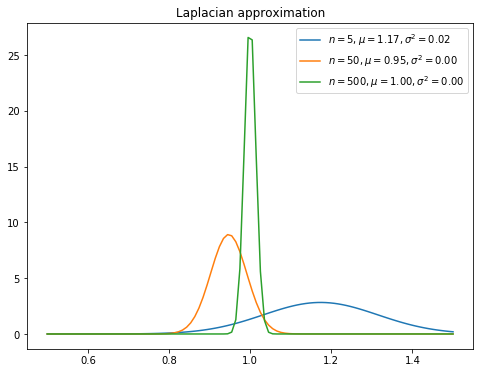

In [28]:
theta0 = 2
sigma0 = np.sqrt(6)

plt.figure(figsize=(8, 6))
for i,n in enumerate(ns):
    with pm.Model() as model_g:
        theta = pm.Normal('theta', theta0, sigma0)
        y = pm.Normal('y', mu=theta, sd=sigma_eta, observed=ys[i])
        mean_theta = pm.find_MAP()
        std_theta = ((1 / pm.find_hessian(mean_theta, vars=[theta]))**0.5)[0]
        print("The estimation of theta: {}".format(mean_theta["theta"]))
        plt.plot(yn, norm(mean_theta["theta"], std_theta).pdf(yn), 
                 label="$n={}, \mu={:.2f}, \sigma^2={:.2f}$".format(n, 
                                                                    mean_theta["theta"], 
                                                                    std_theta[0]**2))
plt.title("Laplacian approximation")
plt.legend()
plt.show()